In [1]:
import pandas as pd

# Загрузка всех файлов CSV в pandas DataFrame
test_double_int_load_results = pd.read_csv('results/test_double_int_load_results.csv')
test_double_int_results = pd.read_csv('results/test_double_int_results.csv')
test_double_string_load_results = pd.read_csv('results/test_double_string_load_results.csv')
test_double_string_results = pd.read_csv('results/test_double_string_results.csv')

test_int_results = pd.read_csv('results/test_int_results.csv')
test_string_load_results = pd.read_csv('results/test_string_load_results.csv')
test_string_results = pd.read_csv('results/test_string_results.csv')


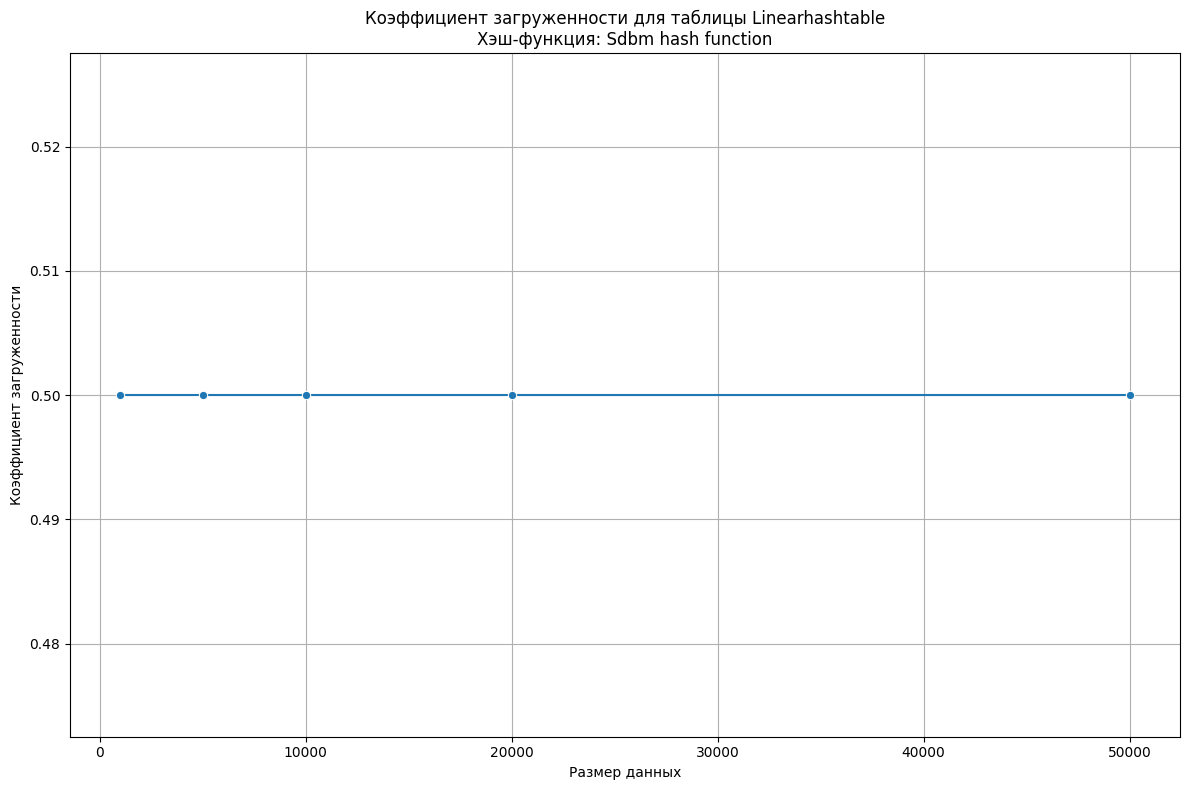

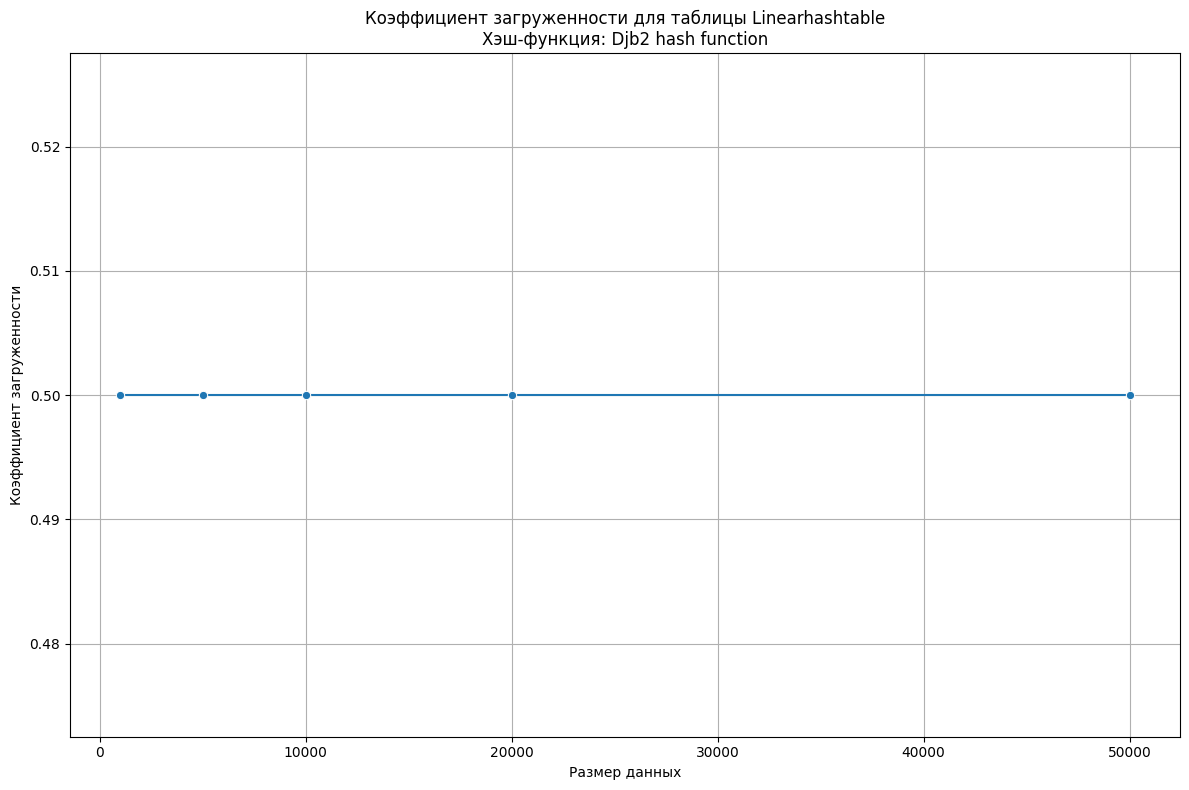

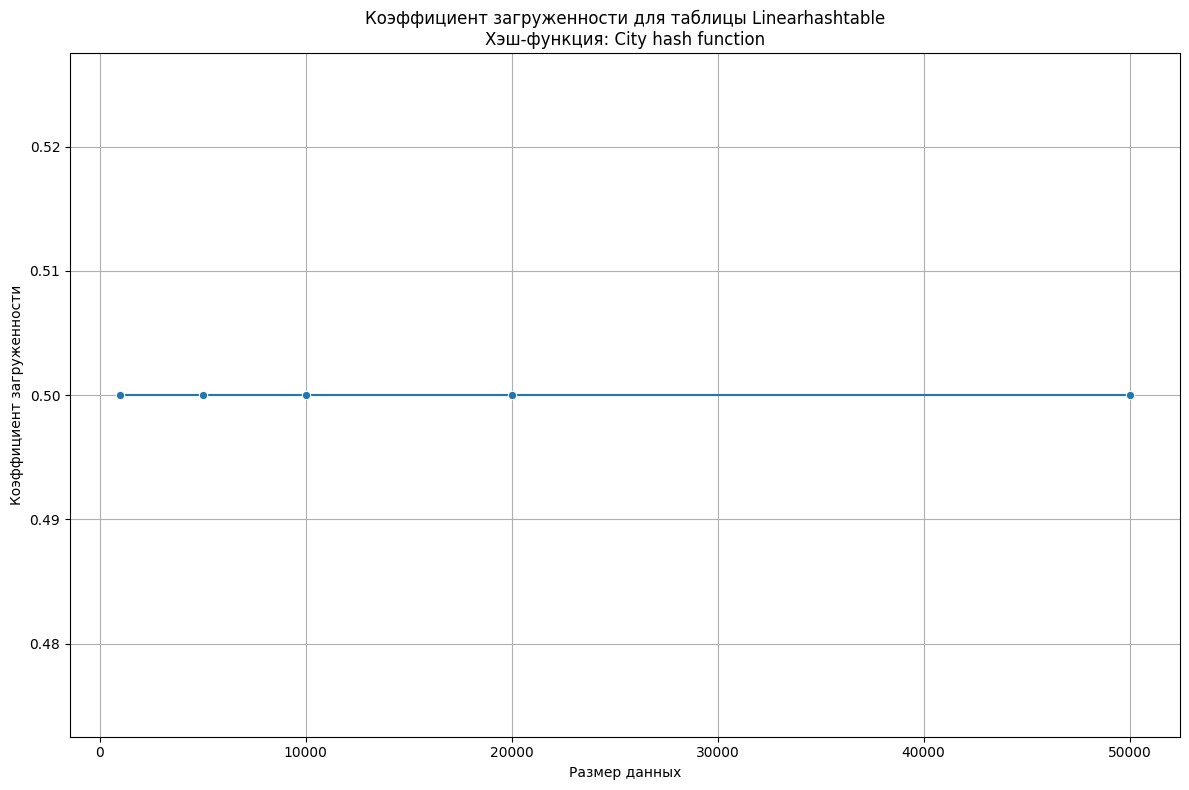

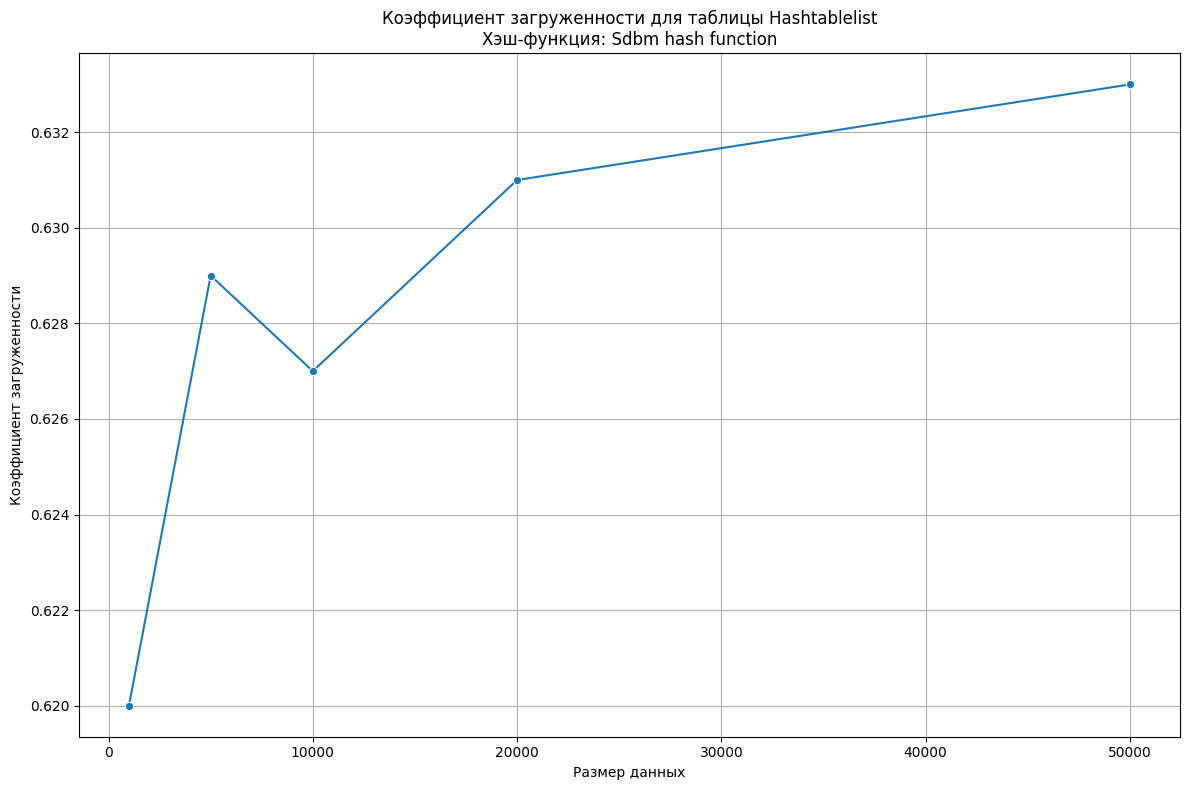

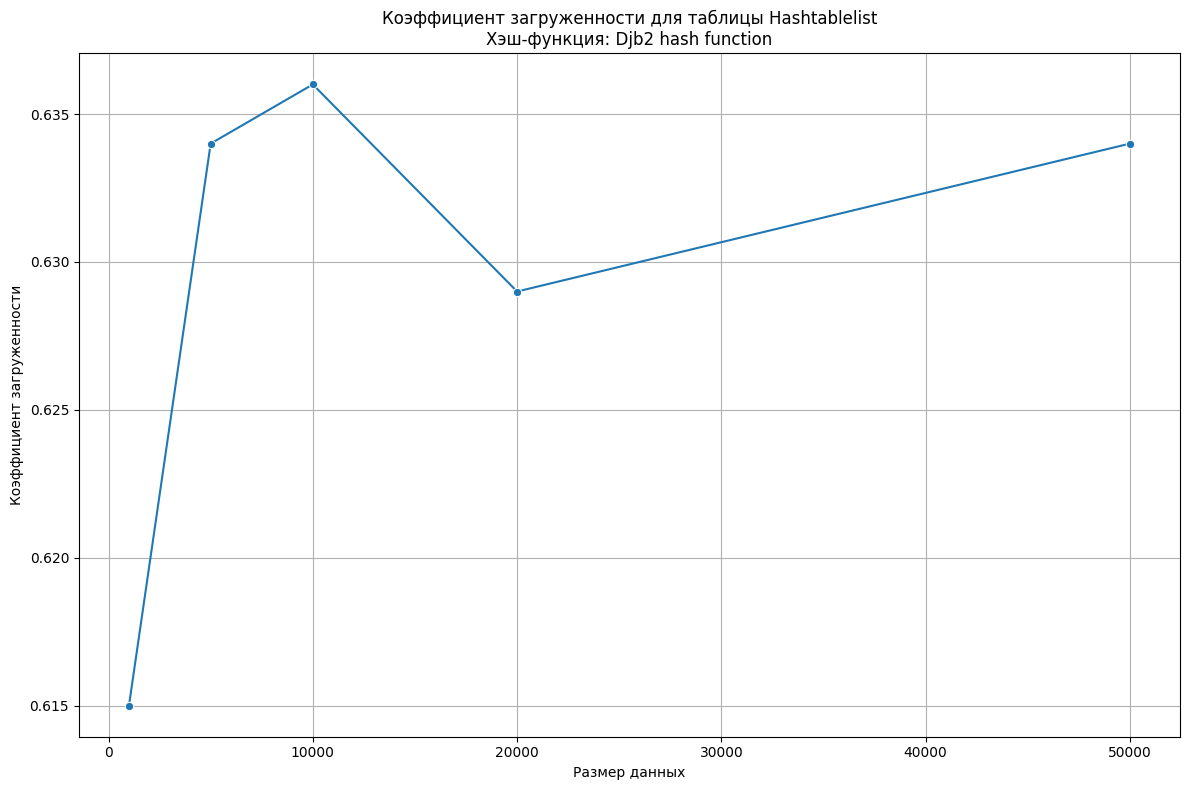

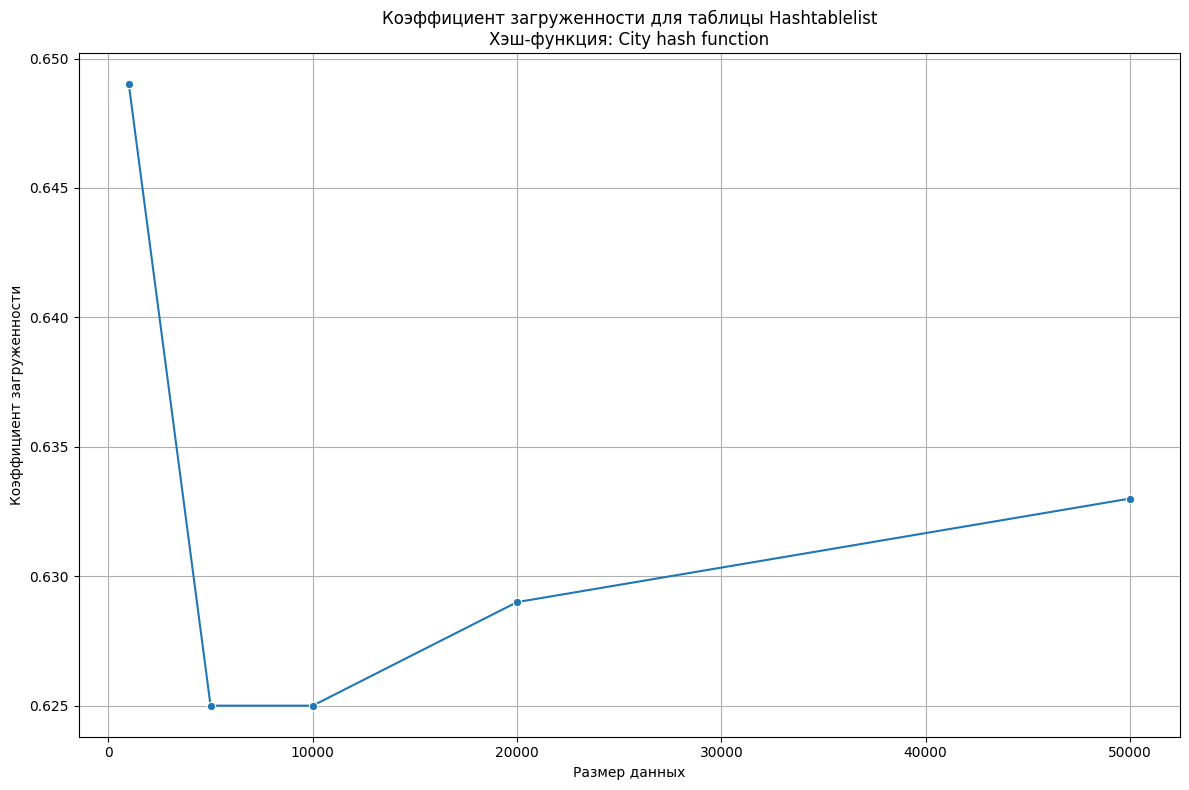

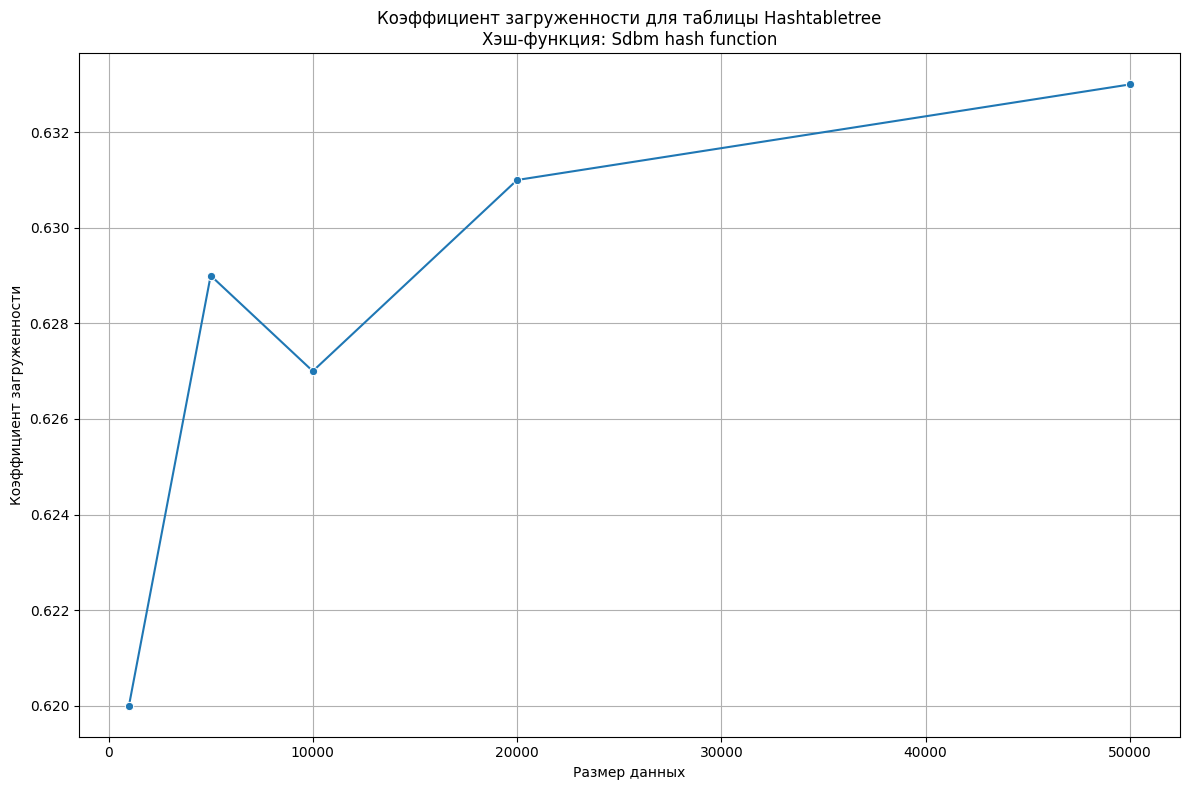

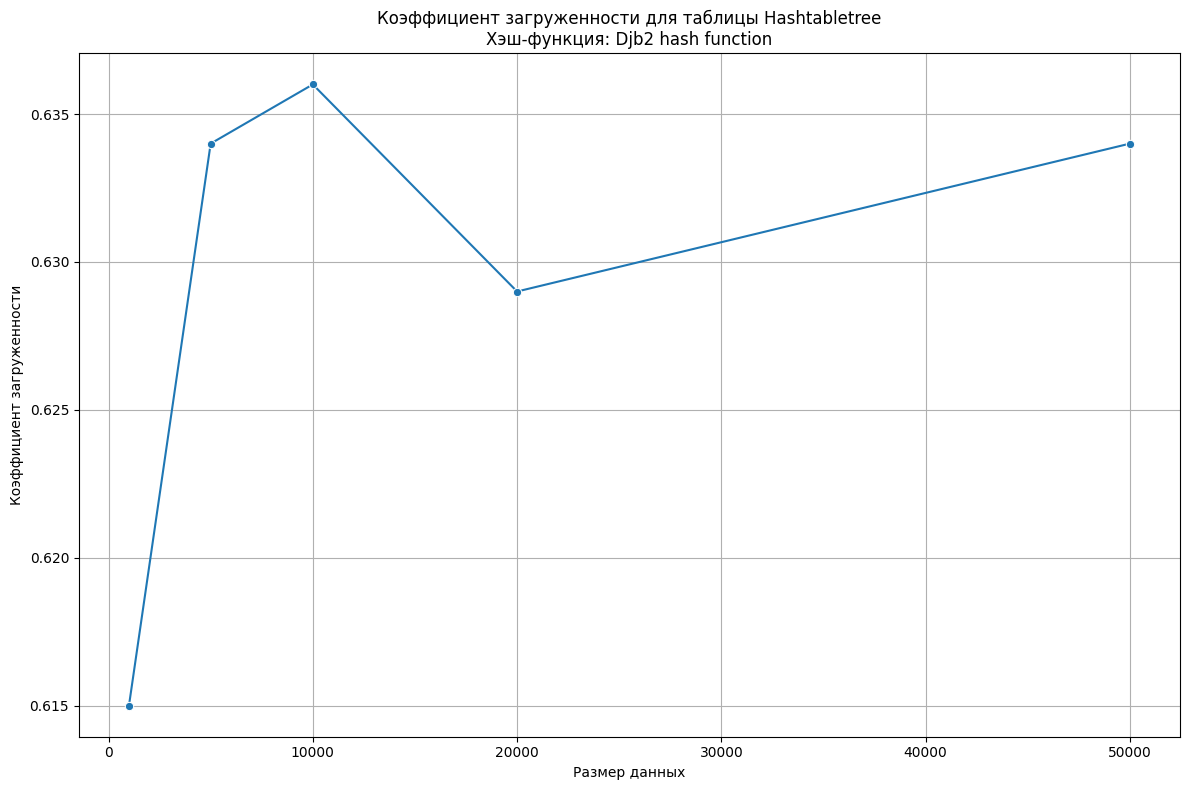

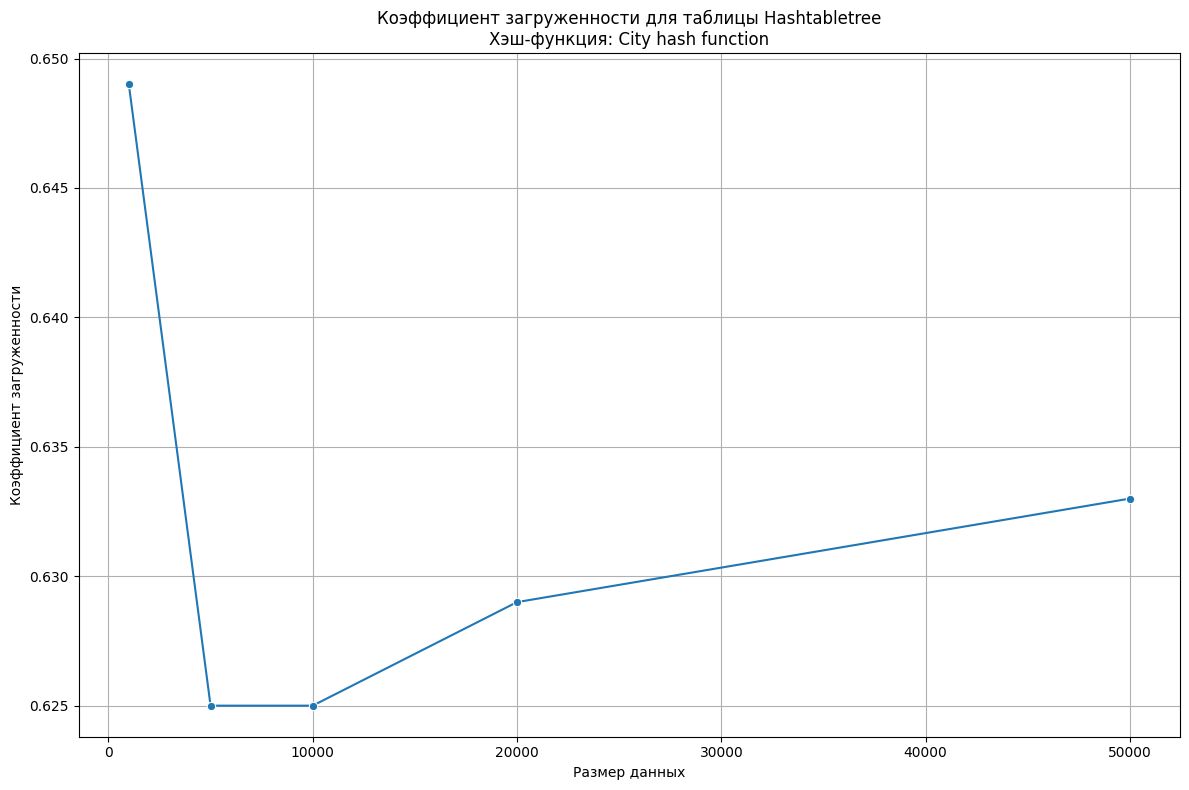

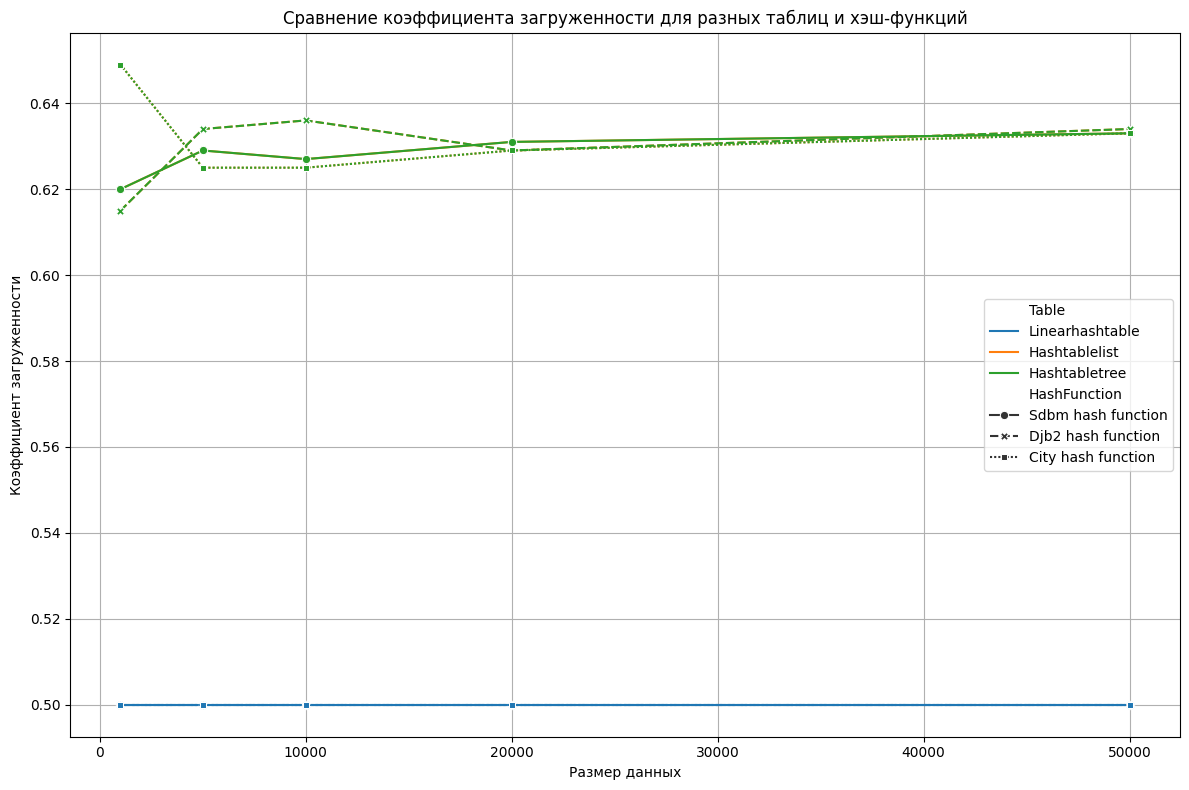

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из CSV
df_load = pd.read_csv('results/test_string_load_results.csv')

# Предварительная обработка данных
df_load = df_load.rename(columns={'Table': 'Table', 'HashFunction': 'HashFunction', 'DataSize': 'DataSize', 'LoadFactor': 'LoadFactor'})
df_load['Table'] = df_load['Table'].str.capitalize()  # Приводим названия таблиц к удобному формату
df_load['HashFunction'] = df_load['HashFunction'].str.capitalize()  # Аналогично для хэш-функций

# 1. Графики для каждой таблицы и каждой хэш-функции
def plot_load_factor_by_table_and_hash_function(df):
    tables = df['Table'].unique()
    for table in tables:
        hash_functions = df[df['Table'] == table]['HashFunction'].unique()
        for hash_function in hash_functions:
            plt.figure(figsize=(12, 8))
            sns.lineplot(
                data=df[(df['Table'] == table) & (df['HashFunction'] == hash_function)],
                x='DataSize', y='LoadFactor', marker='o'
            )
            plt.title(f'Коэффициент загруженности для таблицы {table}\nХэш-функция: {hash_function}')
            plt.xlabel('Размер данных')
            plt.ylabel('Коэффициент загруженности')
            plt.grid(True)
            plt.tight_layout()
            plt.show()

# 2. Общий график для сравнения всех таблиц и хэш-функций
def plot_overall_comparison(df):
    plt.figure(figsize=(12, 8))
    sns.lineplot(
        data=df,
        x='DataSize', y='LoadFactor', hue='Table', style='HashFunction', markers=True
    )
    plt.title('Сравнение коэффициента загруженности для разных таблиц и хэш-функций')
    plt.xlabel('Размер данных')
    plt.ylabel('Коэффициент загруженности')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Вызов функций для построения графиков
plot_load_factor_by_table_and_hash_function(df_load)
plot_overall_comparison(df_load)



C:\Users\buddy\AppData\Local\Temp\ipykernel_20388\2837486040.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


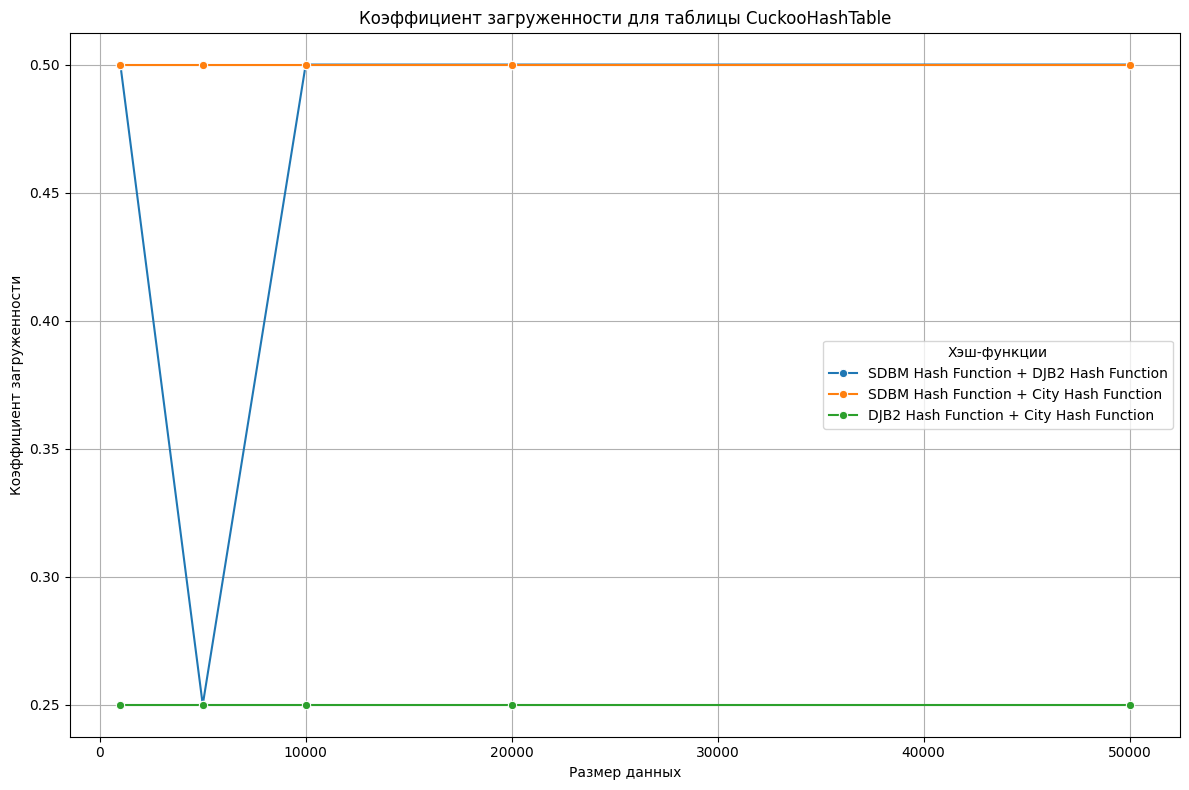

C:\Users\buddy\AppData\Local\Temp\ipykernel_20388\2837486040.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


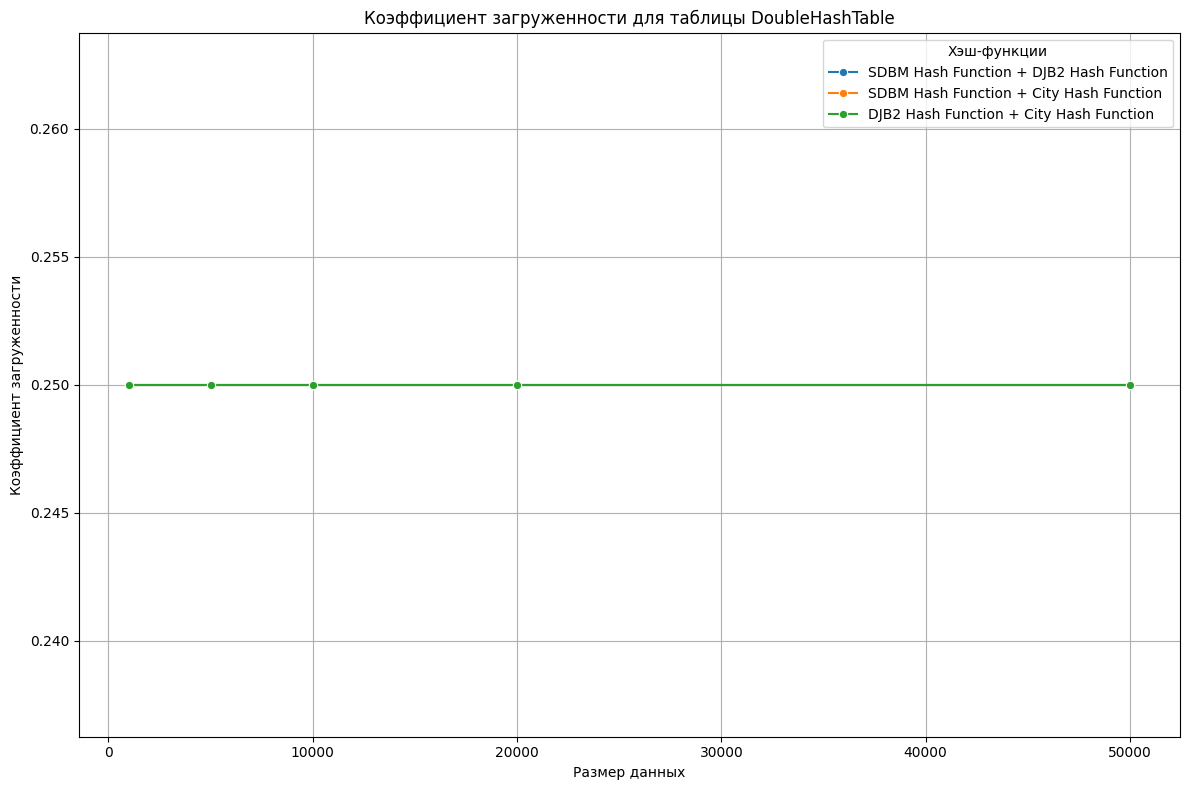

C:\Users\buddy\AppData\Local\Temp\ipykernel_20388\2837486040.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


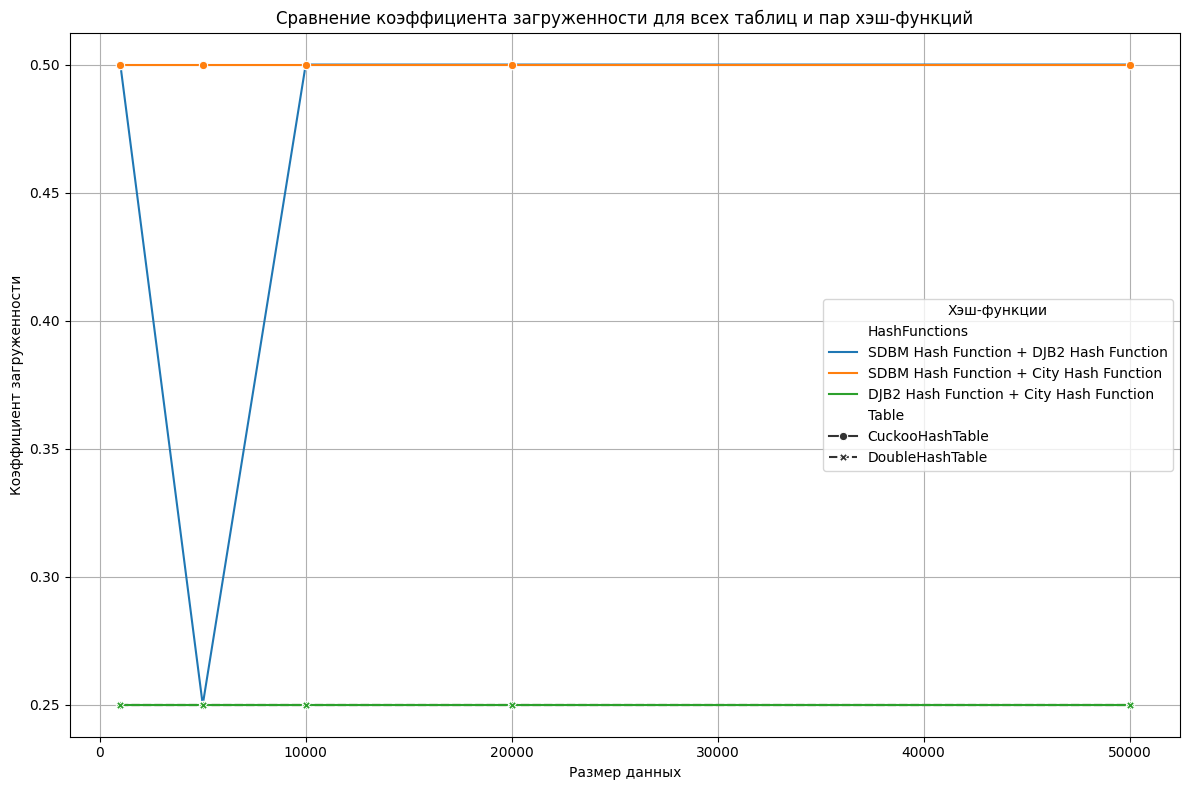

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из CSV
df_load = pd.read_csv('results/test_double_string_load_results.csv')

# Создаем новый столбец, который объединяет две хэш-функции в одно значение
df_load['HashFunctions'] = df_load['HashFunction1'] + " + " + df_load['HashFunction2']

# 1. Графики для каждой таблицы и каждой пары хэш-функций
def plot_load_factor_by_table_and_hash_functions(df):
    tables = df['Table'].unique()
    for table in tables:
        plt.figure(figsize=(12, 8))
        
        # Создаем график для каждой таблицы
        sns.lineplot(
            data=df[df['Table'] == table],
            x='DataSize', y='LoadFactor', hue='HashFunctions', marker='o', ci=None
        )
        plt.title(f'Коэффициент загруженности для таблицы {table}')
        plt.xlabel('Размер данных')
        plt.ylabel('Коэффициент загруженности')
        plt.grid(True)
        plt.tight_layout()
        plt.legend(title="Хэш-функции")
        plt.show()

# 2. Общий график для сравнения всех таблиц и пар хэш-функций без доверительных интервалов
def plot_overall_comparison_without_confidence(df):
    plt.figure(figsize=(12, 8))
    
    # Создание графика для всех таблиц и пар хэш-функций
    sns.lineplot(
        data=df,
        x='DataSize', y='LoadFactor', hue='HashFunctions', style='Table', markers=True, ci=None
    )
    plt.title('Сравнение коэффициента загруженности для всех таблиц и пар хэш-функций')
    plt.xlabel('Размер данных')
    plt.ylabel('Коэффициент загруженности')
    plt.grid(True)
    plt.tight_layout()
    plt.legend(title="Хэш-функции")
    plt.show()

# Вызов функций для построения графиков
plot_load_factor_by_table_and_hash_functions(df_load)
plot_overall_comparison_without_confidence(df_load)


